In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
data=pd.read_csv('/home/danhd/Desktop/ZingMp3_Spam/spam1610.txt',sep='\t',header=None)
data.columns = ['songID','IP','username','visitorID','details','t1','t10']
data.head(4)

,songID,IP,username,visitorID,details,t1,t10
0,1074806053,171.249.88.28,NaN,NaN,"{""strGenreId"":""1"",""artistId"":""42090"",""id"":""107...",1,10
1,1075757848,113.23.51.111,NaN,NaN,"{""strGenreId"":""1"",""artistId"":""966"",""id"":""10757...",1,10
2,1075412108,103.199.32.196,NaN,NaN,"{""strGenreId"":""1"",""artistId"":""67526"",""id"":""107...",1,10
3,1075750904,113.175.17.152,hoe1234567,NaN,"{""strGenreId"":""1"",""from_id"":""album"",""artistId""...",1,10


In [2]:
groupData=data.groupby(['songID']).agg({'IP':pd.Series.nunique,'songID':pd.Series.count})
groupData.head(6)

,IP,songID
songID,,
17,1,1
34,2,5
100,1,1
106,1,1
129,1,1
151,2,2


In [3]:
data['visitorID'].describe()

count     0
mean    NaN
std     NaN
min     NaN
25%     NaN
50%     NaN
75%     NaN
max     NaN
Name: visitorID, dtype: float64

In [5]:
groupData.columns=['IP count','Listen count']
print groupData.head(6)

        IP count  Listen count
songID                        
11             1             1
17             1             1
112            2             3
128            1             1
151            1             1
155            1             2

[6 rows x 2 columns]


In [6]:
groupData.describe()

,IP count,Listen count
count,203844.000000,203844.000000
mean,27.997792,36.282255
std,660.279820,908.220568
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,4.000000,5.000000
max,110301.000000,166152.000000


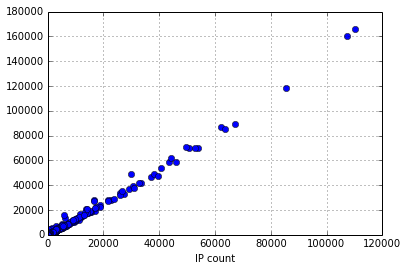

In [51]:
groupData.plot(x='IP count',y='Listen count',style='o')

In [52]:
filterIPData=groupData[groupData['IP count']<=40000]
filterIPData.head(6)

,IP count,Listen count
songID,,
11,1,1
17,1,1
112,2,3
128,1,1
151,1,1
155,1,2


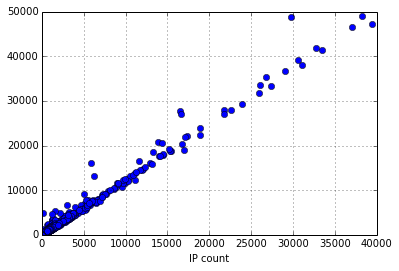

In [53]:
filterIPData.plot(x='IP count',y='Listen count',style='o')

In [8]:
data['visitorID'].describe()

count     0
mean    NaN
std     NaN
min     NaN
25%     NaN
50%     NaN
75%     NaN
max     NaN
Name: visitorID, dtype: float64

In [10]:
dataUser=data.dropna(subset=['username'])
dataUser.head(6)

,songID,IP,username,visitorID,details,t1,t10
3,1074797521,1.53.219.158,fb.sad_wolf96,NaN,"{""strGenreId"":""1"",""from_id"":""playlist"",""artist...",1,10
5,1075344293,203.128.247.114,trinhtudo74,NaN,"{""strGenreId"":""1"",""from_id"":""album"",""artistId""...",1,10
6,1074986930,1.54.192.153,trunghieubui.92,NaN,"{""strGenreId"":""1"",""from_id"":""album"",""artistId""...",1,10
10,1075752472,14.184.226.88,pimpim_kute_baby,NaN,"{""strGenreId"":""1"",""from_id"":""playlist"",""artist...",1,10
11,1075551390,14.186.119.92,vothienskv,NaN,"{""strGenreId"":""1"",""artistId"":""14321"",""id"":""107...",1,10
14,1075509006,113.22.191.201,rubuy123,NaN,"{""strGenreId"":""3"",""from_id"":""album"",""artistId""...",1,10


In [11]:
groupUserData=dataUser.groupby(['songID']).agg({'username':pd.Series.nunique,'songID':pd.Series.count})
groupUserData.columns=['User count','Listen count']
print groupUserData.head(6)

        User count  Listen count
songID                          
215              1             3
486              1            10
559              1             2
797              1             1
880              1             1
903              1             1

[6 rows x 2 columns]


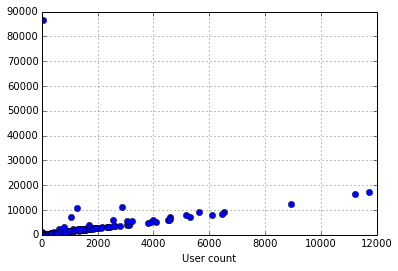

In [42]:
groupUserData.plot(x='User count',y='Listen count',style='o')


In [47]:
filterData=groupUserData[groupUserData['User count']<=500]
filterData.head(6)

,User count,Listen count
songID,,
215,1,3
486,1,10
559,1,2
797,1,1
880,1,1
903,1,1


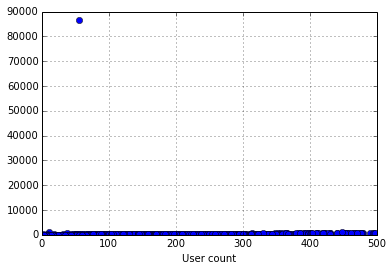

In [50]:
filterData.plot(x='User count',y='Listen count',style='o')

In [46]:
abnormal=filterData[filterData['Listen count']>5000]
print abnormal

            User count  Listen count
songID                              
1075509248          56         86684
1075525165        3918          5217
1075528563        1054          7313
1075550468        3989          5880
1075551390        1256         10703
1075750904        2873         11182
1075751728        2556          6146
1075764711        3055          5480
1075765293        3218          5595

[9 rows x 2 columns]


# For User

In [14]:
groupUser=dataUser.groupby(['username']).agg({'songID':pd.Series.nunique,'username':pd.Series.count})
groupUser.head(6)

,username,songID
username,,
000000datpro,8,6
000111sdfg,27,18
0007thien,39,39
000c0c000,12,12
000kehanthu000,1,1
000ngoctrung000,17,7


In [25]:
groupUser.columns=['Listen count','Song count']
print groupUser.head(6)


                 Listen count  Song count
username                                 
000000datpro                8           6
000111sdfg                 27          18
0007thien                  39          39
000c0c000                  12          12
000kehanthu000              1           1
000ngoctrung000            17           7

[6 rows x 2 columns]


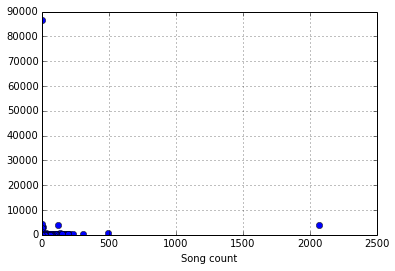

In [27]:
groupUser.plot(x='Song count',y='Listen count',style='o')

# For IP

In [28]:
groupIPData=data.groupby(['IP']).agg({'songID':pd.Series.nunique,'IP':pd.Series.count})
groupIPData.head(6)

,IP,songID
IP,,
0.0.0.0,2,2
0.0.126.254,1,1
0.0.8.250,1,1
0.0.80.198,1,1
1.1.1.1,1,1
1.10.170.85,9,9


In [32]:
groupIPData.columns=['Listen count','Song count']
print groupIPData.head(6)

             Listen count  Song count
IP                                   
0.0.0.0                 2           2
0.0.126.254             1           1
0.0.8.250               1           1
0.0.80.198              1           1
1.1.1.1                 1           1
1.10.170.85             9           9

[6 rows x 2 columns]


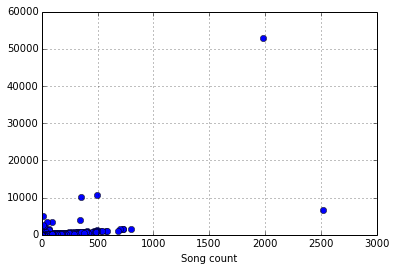

In [33]:
groupIPData.plot(x='Song count',y='Listen count',style='o')

In [54]:
exportData=data[['songID','IP','username']]
exportData.head(6)

,songID,IP,username
0,1075468549,171.224.90.96,NaN
1,879744,113.184.61.228,NaN
2,1075003838,42.112.238.77,NaN
3,1074797521,1.53.219.158,fb.sad_wolf96
4,6089557,183.91.27.8,NaN
5,1075344293,203.128.247.114,trinhtudo74


In [55]:
exportData.to_csv('data_1110', sep='\t')